In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data3=pd.read_csv("Bigmart_Train.csv")
data1=pd.read_csv('Bigmart_Test.csv')
print(data3)
print(data1)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [16]:
data3.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
data3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
corr_matrix=data3.corr()
corr_matrix['Item_Outlet_Sales']

Unnamed: 0          -0.012611
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [18]:
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('LF','Low Fat')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('reg','Regular')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('low fat','Low Fat')


In [19]:
data3['Item_Weight'].fillna(data3['Item_Weight'].mean(), inplace=True)

In [20]:
data3['Outlet_Size']=data3['Outlet_Size'].replace(np.nan,'Medium' )

In [21]:
data3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

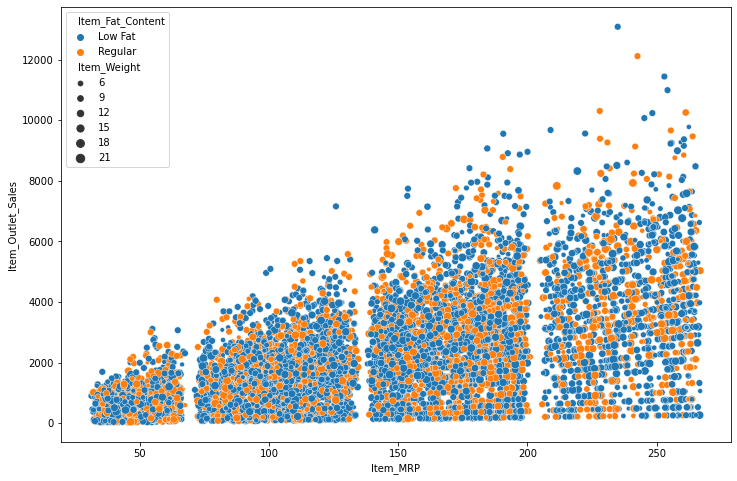

In [22]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=data3)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

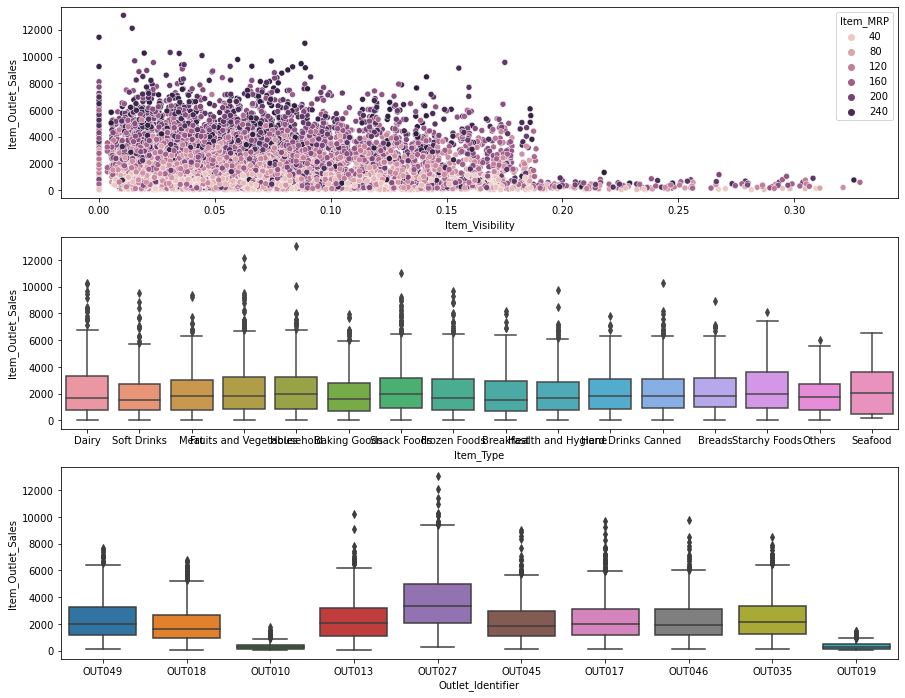

In [23]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=data3)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=data3)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=data3)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

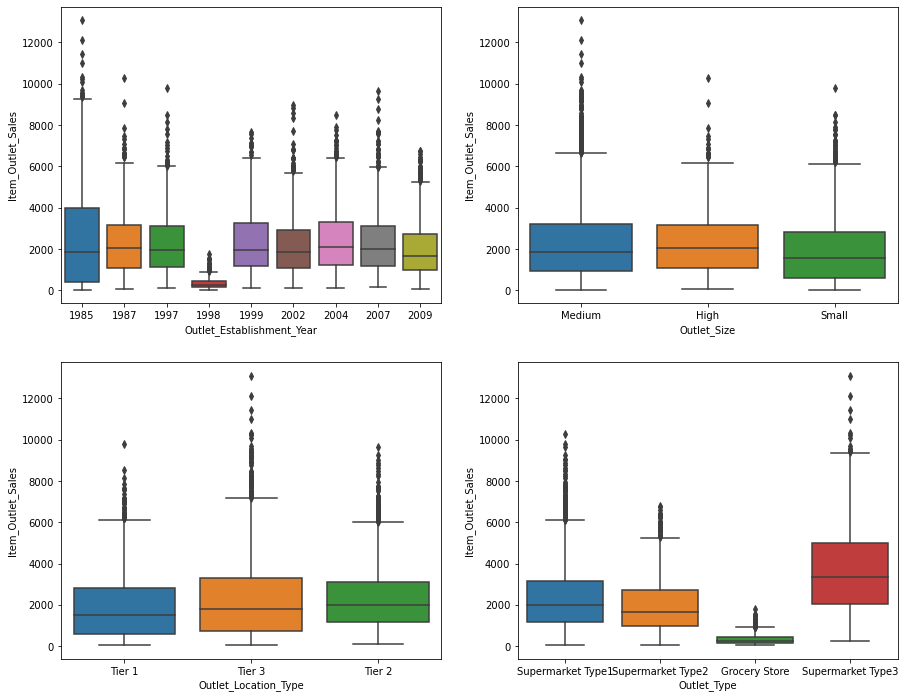

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=data3)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=data3)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=data3)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=data3)

In [26]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
le1=  LabelEncoder()
data3['Item_Fat_Content']= le.fit_transform(data3['Item_Fat_Content']) 
data3['Item_Type']=le.fit_transform(data3['Item_Type'])
data3['Outlet_Identifier']=le.fit_transform(data3['Outlet_Identifier'])
data3['Outlet_Location_Type']=le.fit_transform(data3['Outlet_Location_Type'])
data3['Outlet_Type']=le.fit_transform(data3['Outlet_Type'])
data3['Item_Identifier']= le.fit_transform(data3['Item_Identifier']) 
data3['Outlet_Size']= le1.fit_transform(data3['Outlet_Size']) 

<AxesSubplot:>

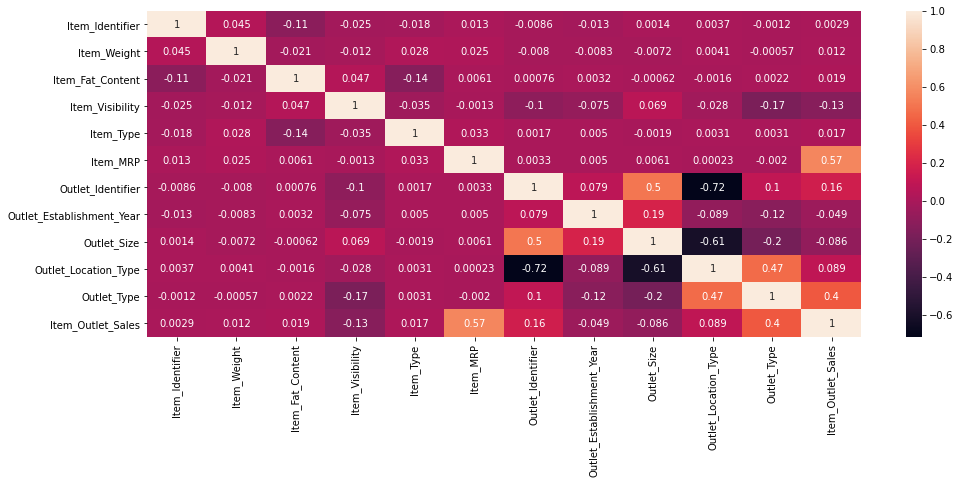

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(data3.corr(), annot=True)

In [28]:
data3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [29]:
y=data3['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [30]:
x=data3.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


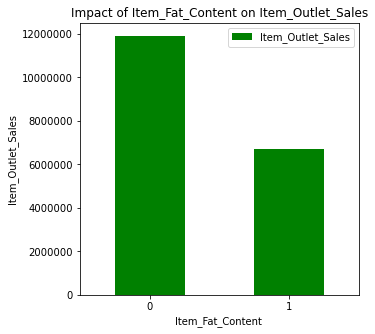

In [31]:
Outlet_Type_pivot = data3.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='GREEN',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

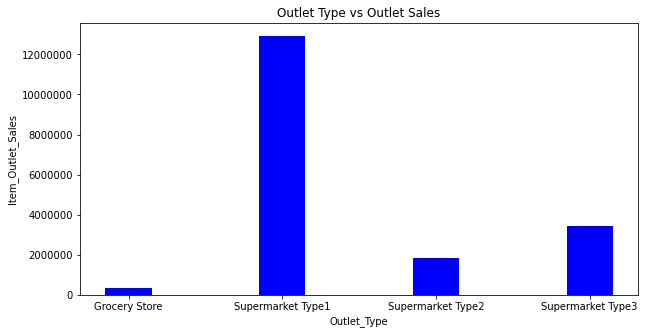

In [32]:
plt.figure(figsize=(10,5))
type2=data3.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.3,color='BLUE')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

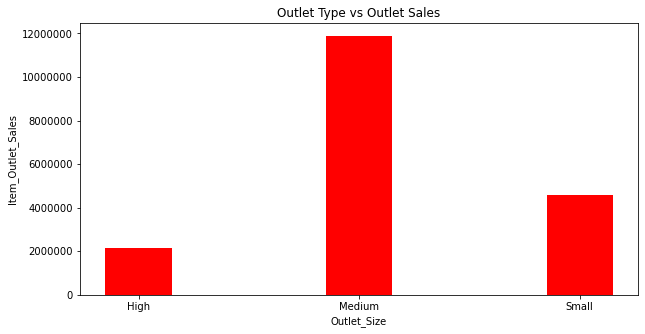

In [33]:
plt.figure(figsize=(10,5))
type3 = data3.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
plt.bar(size, type3, color='RED',width=0.3)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.25)

In [35]:
X_train.shape , X_test.shape

((6392, 11), (2131, 11))

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(X_test)
mse=mean_squared_error(Y_test,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1167.3318270979541

In [38]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,Y_train)
predict_r=r.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
r_score=np.sqrt(mse)
r_score

1167.3193481989147

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
predict_r=dtr.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
dtr_score=np.sqrt(mse)
dtr_score


1473.1286149839575

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predict_r=rf.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
rf_score=np.sqrt(mse)
rf_score

1097.4009047466818

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
p=gbr.predict(X_test)
gb_score=mean_squared_error(Y_test,p)
gb_score=np.sqrt(gb_score)
gb_score

1061.9063493565984

In [44]:
name=['Linear Regression','Ridge Regression',
     'Decision Tree Regression','Random Forest',
     'Gradient Boost']

In [45]:
go=pd.DataFrame({'RMSE':[lr_score,r_score,dtr_score,rf_score,gb_score]},index=name)

In [46]:
go.RMSE.sort_values()

Gradient Boost              1061.906349
Random Forest               1097.400905
Ridge Regression            1167.319348
Linear Regression           1167.331827
Decision Tree Regression    1473.128615
Name: RMSE, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

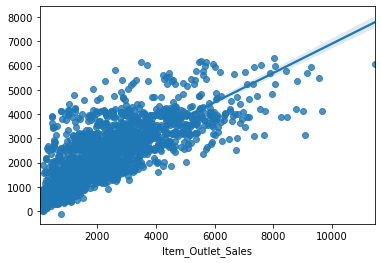

In [47]:
sns.regplot(Y_test, p)

In [48]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [49]:
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('LF','Low Fat')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('reg','Regular')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('low fat','Low Fat')
data1['Item_Weight'].fillna(data1['Item_Weight'].mean(), inplace=True)
data1['Outlet_Size']=data1['Outlet_Size'].replace(np.nan,'Medium' )
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [50]:
data1['Item_Fat_Content']= le.fit_transform(data1['Item_Fat_Content']) 
data1['Item_Type']=le.fit_transform(data1['Item_Type'])
data1['Outlet_Identifier']=le.fit_transform(data1['Outlet_Identifier'])
data1['Outlet_Location_Type']=le.fit_transform(data1['Outlet_Location_Type'])
data1['Outlet_Type']=le.fit_transform(data1['Outlet_Type'])
data1['Item_Identifier']= le.fit_transform(data1['Item_Identifier']) 
data1['Outlet_Size']= le1.fit_transform(data1['Outlet_Size']) 

In [51]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


In [52]:
predict=gbr.predict(data1)
predict

array([1640.90228508, 1430.51010463,  579.43446706, ..., 1896.48295104,
       3574.49558028, 1196.72466938])

In [54]:
sample=pd.read_csv('BigMart_Sales_Prediction.csv')

In [55]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [56]:
del sample['Item_Outlet_Sales']

In [57]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1640.902285
1,FDW14,OUT017,1430.510105
2,NCN55,OUT010,579.434467
3,FDQ58,OUT017,2574.957619
4,FDY38,OUT027,5724.975788
...,...,...,...
5676,FDB58,OUT046,2291.822814
5677,FDD47,OUT018,2430.141104
5678,NCO17,OUT045,1896.482951
5679,FDJ26,OUT017,3574.495580


In [58]:
submit=corr_ans.to_csv('correct.csv',index=None)